
# **Table of Content**

1. **Data Exploring**
2. **Question and Answers**
    - Average monthly sales
    - Best selling products
    - RFM Customer Segmentation
    - K-means Customer Segmentation
3. **Marketing Analytics**
    - Identifying High-value Customers
    - Describing High-value Customers Persona
    - Describing High-value Customers' Behaviour


In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30)

In [104]:
df = pd.read_csv('MIS384_Assignment 1_Data.csv')
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Delivery Days
0,IN-2022-JS156857-42035,31/1/2022,1/2/2022,First Class,JS-156857,Jim Sink,Corporate,Townsville,Queensland,Australia,Oceania,Asia Pacific,TEC-CO-3597,Technology,Copiers,"Brother Fax Machine, High-Speed",2565,9,0.1,28,766,Critical,1
1,IN-2022-MW182207-42221,5/8/2022,6/8/2022,First Class,MW-182207,Mitch Webber,Consumer,Geraldton,Western Australia,Australia,Oceania,Asia Pacific,OFF-AP-3577,Office Supplies,Appliances,"Breville Refrigerator, White",4191,9,0.1,1164,614,High,1
2,IN-2022-JH158207-42140,16/5/2022,18/5/2022,Second Class,JH-158207,John Huston,Consumer,Melbourne,Victoria,Australia,Oceania,Asia Pacific,TEC-PH-3147,Technology,Phones,"Apple Smart Phone, Cordless",2863,5,0.1,858,581,Critical,2
3,IN-2022-RW195407-42327,19/11/2022,25/11/2022,Standard Class,RW-195407,Rick Wilson,Corporate,Perth,Western Australia,Australia,Oceania,Asia Pacific,TEC-PH-3806,Technology,Phones,"Cisco Smart Phone, Full Size",3524,6,0.1,861,531,Low,6
4,IN-2022-MP181757-42347,9/12/2022,11/12/2022,First Class,MP-181757,Mike Pelletier,Home Office,Perth,Western Australia,Australia,Oceania,Asia Pacific,TEC-PH-3149,Technology,Phones,"Apple Smart Phone, with Caller ID",1725,3,0.1,747,479,High,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,ID-2012-NB1858092-41241,28/11/2012,4/12/2012,Standard Class,NB-1858092,Nicole Brennan,Corporate,Nelson,Nelson,New Zealand,Oceania,Asia Pacific,OFF-AR-6122,Office Supplies,Art,"Stanley Pens, Easy-Erase",12,2,0.4,-1,1,Medium,6
3483,IN-2012-TB213557-41066,6/6/2012,11/6/2012,Second Class,TB-213557,Todd Boyes,Corporate,Toowoomba,Queensland,Australia,Oceania,Asia Pacific,FUR-FU-5726,Furniture,Furnishings,"Rubbermaid Door Stop, Erganomic",190,5,0.1,78,1,Medium,5
3484,ID-2012-LO1717092-41034,5/5/2012,9/5/2012,Standard Class,LO-1717092,Lori Olson,Corporate,Waitakere,Auckland,New Zealand,Oceania,Asia Pacific,OFF-ST-4031,Office Supplies,Storage,"Eldon Box, Wire Frame",11,2,0.4,-3,1,High,4
3485,ID-2012-RS194207-41142,21/8/2012,26/8/2012,Standard Class,RS-194207,Ricardo Sperren,Corporate,Geelong,Victoria,Australia,Oceania,Asia Pacific,OFF-FA-5465,Office Supplies,Fasteners,"OIC Clamps, Metal",53,3,0.1,-1,1,Medium,5


## **1. Data Exploring**

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        3487 non-null   object 
 1   Order Date      3487 non-null   object 
 2   Ship Date       3487 non-null   object 
 3   Ship Mode       3487 non-null   object 
 4   Customer ID     3487 non-null   object 
 5   Customer Name   3487 non-null   object 
 6   Segment         3487 non-null   object 
 7   City            3487 non-null   object 
 8   State           3487 non-null   object 
 9   Country         3487 non-null   object 
 10  Region          3487 non-null   object 
 11  Market          3487 non-null   object 
 12  Product ID      3487 non-null   object 
 13  Category        3487 non-null   object 
 14  Sub-Category    3487 non-null   object 
 15  Product Name    3487 non-null   object 
 16  Sales           3487 non-null   int64  
 17  Quantity        3487 non-null   i

In [106]:
df[df.duplicated(keep=False)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Delivery Days
3448,ID-2012-AR105107-41031,2/5/2012,8/5/2012,Standard Class,AR-105107,Andrew Roberts,Consumer,Armidale,New South Wales,Australia,Oceania,Asia Pacific,OFF-BI-3736,Office Supplies,Binders,"Cardinal Hole Reinforcements, Recycled",15,3,0.1,2,1,Medium,6
3453,ID-2012-AR105107-41031,2/5/2012,8/5/2012,Standard Class,AR-105107,Andrew Roberts,Consumer,Armidale,New South Wales,Australia,Oceania,Asia Pacific,OFF-BI-3736,Office Supplies,Binders,"Cardinal Hole Reinforcements, Recycled",15,3,0.1,2,1,Medium,6


In [107]:
df.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
Delivery Days     0
dtype: int64

## **2. Question and Answer**

### **What is the monthly count of customers who purchased products in average?**

In [108]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month and year from 'Order Date'
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Group by month and year, count distinct customers
monthly_customer_count = df.groupby(['Year', 'Month'])['Customer ID'].nunique()


average_customer_count = monthly_customer_count.mean()
print("Average monthly count of customers who purchased products:", round(average_customer_count), 'customers')

Average monthly count of customers who purchased products: 36 customers


### **What is the best-selling product in each country? (Hints: use Quantity as the indicator for best-selling measure**

In [109]:
# get quantity of product by country
df_country = pd.DataFrame(df.groupby(['Country', 'Product Name'])['Quantity'].sum()).reset_index()

# get the max quanity of products
dict_max_quantity = dict(df_country.groupby('Country')['Quantity'].max())

# extract index of best selling product
index_max_product = []
for country, max_quan in dict_max_quantity.items():
    product_index = df_country[(df_country['Country'] == country)  & (df_country['Quantity'] == max_quan)].index.to_list()
    for ind in product_index:
        index_max_product.append(ind)
# display
df_country.iloc[index_max_product,:]

,Country,Product Name,Quantity
712,Australia,"Hon Executive Leather Armchair, Adjustable",37
1535,New Zealand,"Cameo Mailers, Set of 50",14
1624,New Zealand,"Enermax Numeric Keypad, USB",14
1708,New Zealand,"Ibico Binding Machine, Durable",14
1744,New Zealand,"Kraft Manila Envelope, with clear poly window",14
1874,New Zealand,"Sharp Copy Machine, Color",14
1932,New Zealand,"Wilson Jones Binder Covers, Durable",14
1947,Papua New Guinea,"Belkin Numeric Keypad, USB",8


### **Score customers by ranking them based on R/F/M attribute separately (Hints: RFM stands for Recency, Frequency, and Monetary value. It is a framework used by businesses to segment their customers based on their purchasing behaviour.)**

Calculating Recency, Frequency, Monetary for Customers

In [110]:
today = pd.to_datetime('now')
recency = df.groupby('Customer ID')['Order Date'].max().apply(lambda x: (today - x).days)
frequency = df.groupby('Customer ID')['Order ID'].nunique()
monetary = df.groupby('Customer ID')['Sales'].sum()

rfm_df = pd.concat([recency, frequency, monetary], axis=1)
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

rfm_df


,Recency,Frequency,Monetary
Customer ID,,,
AA-103157,594,1,355
AA-103757,472,1,444
AA-1037592,4204,1,701
AA-104807,894,1,1171
AA-106457,654,2,1725
...,...,...,...
XP-2186592,1049,2,912
YC-2189592,4149,1,1181
YS-218807,878,1,2052


<Axes: >

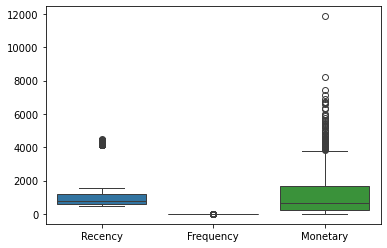

In [111]:
sns.boxplot(data=rfm_df)

**Customer Segmentation result from SQL**

Import data from SQL queries

In [112]:
df_segment = pd.read_csv('customer_segments.csv')
df_segment['rfm_cell'] = df_segment['rfm_cell'].astype(str)
df_segment

,customer_id,rfm_cell
0,DM-130157,555
1,GD-145907,555
2,KN-164507,555
3,IG-150857,555
4,BE-113357,555
...,...,...
916,TW-210257,111
917,TP-214157,111
918,JM-155807,111
919,RD-195857,111


**Customer Segmentation with K-means**

Choosing number of  cluster with Elbow method

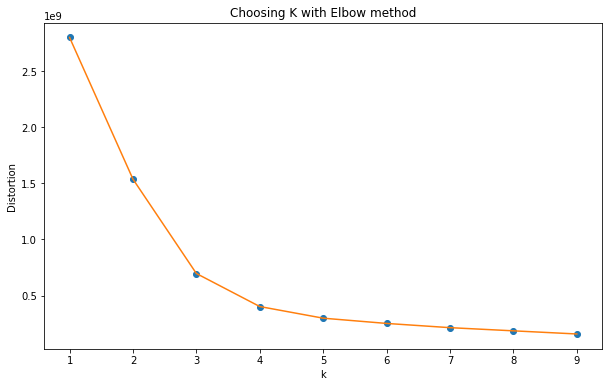

In [113]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Choosing K with the elbow method
# Select features for clustering
list_columns_cluster = ['Recency', 'Frequency', 'Monetary']
X = rfm_df[list_columns_cluster]

K = range(1, 10)
distortions = []
for k in K:
    model = KMeans(n_clusters=k, init='k-means++', n_init=15, max_iter=350, random_state=42)
    model.fit(X)
    distortions.append(model.inertia_)

# Visualize result
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'o')
plt.plot(K, distortions, '-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Choosing K with Elbow method')
plt.show()

*From the chart, I believed 4 is the optimal number for clusters*

Clustering results with k = 4

In [114]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Select features for clustering
list_columns_cluster = ['Recency', 'Frequency', 'Monetary']
# , 'average_spending' , 'number_of_transaction'
X = rfm_df[list_columns_cluster]

# Scale data
scaler = MinMaxScaler()
X_encoded = scaler.fit_transform(X)

# Assuming you've chosen K based on the elbow method
chosen_k = 4  # Adjust this based on your elbow plot
# Train the KMeans model with the chosen K
model = KMeans(n_clusters=chosen_k, init='k-means++', n_init=15, max_iter=350, random_state=42)
model.fit(X_encoded)

# centroids = pd.DataFrame(model.cluster_centers_, columns=list_columns_cluster).transpose()

# Inverse transform the centroids with MinMaxScaler
centroids_original = scaler.inverse_transform(model.cluster_centers_)

# Create a DataFrame with the original centroids
centroids_df = pd.DataFrame(centroids_original, columns=list_columns_cluster).transpose()
centroids_df = round(centroids_df).astype(int)

centroids_df

,0,1,2,3
Recency,878,4265,679,769
Frequency,1,1,4,3
Monetary,691,622,1588,4534


## **Marketing Analysis: Identifying High-value Customers and Recommending Approaches**

#### **Identifying High-Values Customers**

In [115]:
df_customer = df.merge(rfm_df, on='Customer ID').merge(df_segment , left_on='Customer ID', right_on='customer_id')
df_customer

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Delivery Days,Month,Year,Recency,Frequency,Monetary,customer_id,rfm_cell
0,IN-2022-JS156857-42035,2022-01-31,1/2/2022,First Class,JS-156857,Jim Sink,Corporate,Townsville,Queensland,Australia,Oceania,Asia Pacific,TEC-CO-3597,Technology,Copiers,"Brother Fax Machine, High-Speed",2565,9,0.1,28,766,Critical,1,1,2022,533,2,2840,JS-156857,545
1,IN-2022-MW182207-42221,2022-08-05,6/8/2022,First Class,MW-182207,Mitch Webber,Consumer,Geraldton,Western Australia,Australia,Oceania,Asia Pacific,OFF-AP-3577,Office Supplies,Appliances,"Breville Refrigerator, White",4191,9,0.1,1164,614,High,1,8,2022,614,2,4798,MW-182207,445
2,IN-2022-JH158207-42140,2022-05-16,18/5/2022,Second Class,JH-158207,John Huston,Consumer,Melbourne,Victoria,Australia,Oceania,Asia Pacific,TEC-PH-3147,Technology,Phones,"Apple Smart Phone, Cordless",2863,5,0.1,858,581,Critical,2,5,2022,685,3,3999,JH-158207,455
3,IN-2022-RW195407-42327,2022-11-19,25/11/2022,Standard Class,RW-195407,Rick Wilson,Corporate,Perth,Western Australia,Australia,Oceania,Asia Pacific,TEC-PH-3806,Technology,Phones,"Cisco Smart Phone, Full Size",3524,6,0.1,861,531,Low,6,11,2022,508,6,6019,RW-195407,555
4,IN-2022-MP181757-42347,2022-12-09,11/12/2022,First Class,MP-181757,Mike Pelletier,Home Office,Perth,Western Australia,Australia,Oceania,Asia Pacific,TEC-PH-3149,Technology,Phones,"Apple Smart Phone, with Caller ID",1725,3,0.1,747,479,High,2,12,2022,488,1,1725,MP-181757,524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,ID-2012-NB1858092-41241,2012-11-28,4/12/2012,Standard Class,NB-1858092,Nicole Brennan,Corporate,Nelson,Nelson,New Zealand,Oceania,Asia Pacific,OFF-AR-6122,Office Supplies,Art,"Stanley Pens, Easy-Erase",12,2,0.4,-1,1,Medium,6,11,2012,4151,1,361,NB-1858092,112
3483,IN-2012-TB213557-41066,2012-06-06,11/6/2012,Second Class,TB-213557,Todd Boyes,Corporate,Toowoomba,Queensland,Australia,Oceania,Asia Pacific,FUR-FU-5726,Furniture,Furnishings,"Rubbermaid Door Stop, Erganomic",190,5,0.1,78,1,Medium,5,6,2012,1311,2,1825,TB-213557,144
3484,ID-2012-LO1717092-41034,2012-05-05,9/5/2012,Standard Class,LO-1717092,Lori Olson,Corporate,Waitakere,Auckland,New Zealand,Oceania,Asia Pacific,OFF-ST-4031,Office Supplies,Storage,"Eldon Box, Wire Frame",11,2,0.4,-3,1,High,4,5,2012,4358,1,11,LO-1717092,121
3485,ID-2012-RS194207-41142,2012-08-21,26/8/2012,Standard Class,RS-194207,Ricardo Sperren,Corporate,Geelong,Victoria,Australia,Oceania,Asia Pacific,OFF-FA-5465,Office Supplies,Fasteners,"OIC Clamps, Metal",53,3,0.1,-1,1,Medium,5,8,2012,622,3,633,RS-194207,443


**Profit contribution by Customer Segments**

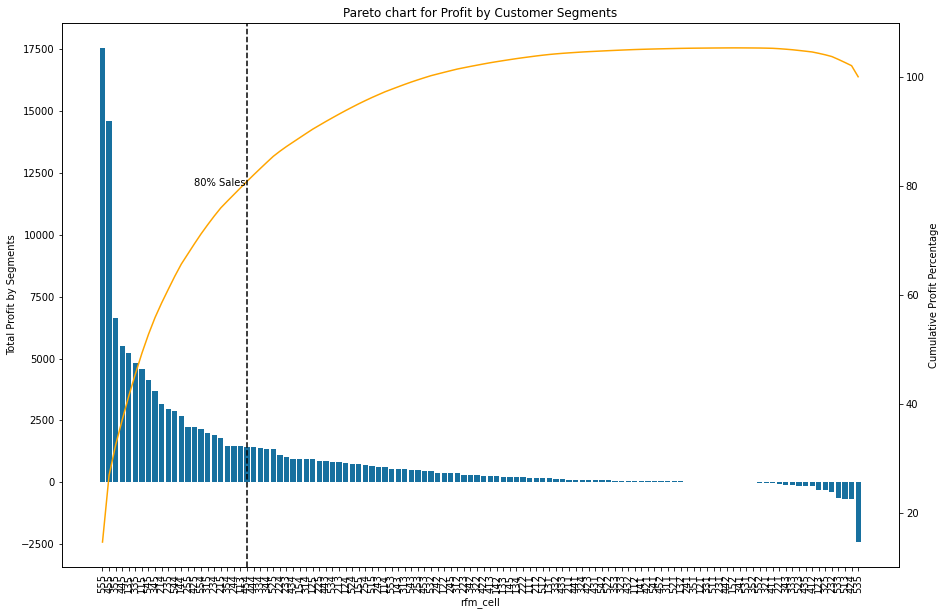

In [167]:
df_pareto = pd.DataFrame(df_customer.groupby('rfm_cell')['Profit'].sum()).sort_values(by='Profit', ascending=False).reset_index()

df_pareto['Cumulative Profit'] = df_pareto['Profit'].cumsum()
total_Profit = df_pareto['Profit'].sum()
df_pareto['Cumulative Profit Percentage'] = (df_pareto['Cumulative Profit'] / total_Profit) * 100

fig, ax1 = plt.subplots(figsize=(15,10))
plt.xticks(rotation=90)

# plot profit in barchart
sns.barplot(data = df_pareto, x='rfm_cell', y='Profit', color='#0077b6', ax=ax1)
ax1.set_ylabel('Total Profit by Segments')

# plot cummu sales percentage
ax2 = plt.twinx()
sns.lineplot(data=df_pareto, x='rfm_cell', y='Cumulative Profit Percentage', ax=ax2, color='orange')
ax2.set_ylabel('Cumulative Profit Percentage')

# dash line 80%
eighty_percent = df_pareto[df_pareto['Cumulative Profit Percentage'] >= 80].iloc[0].name
plt.axvline(x=eighty_percent, color='black', linestyle='--')
# note 80%
plt.text(x=14, y=80, s='80% Sales')
plt.title('Pareto chart for Profit by Customer Segments')

plt.tight_layout()
plt.show()


From figure 4, we can observe that:
-	Approximately 20% of the groups contribute to 80% of the total sales. This 20% consists of 1556 customers. Given the assumption that Kogan.com operates within a constrained budget, we can only implement campaigns focusing on this group. This analysis will focus on describing this group of High-value Customers and provide recommendations on how to approach them.  
-	There are groups of customers causing negativity in the profit. This negativity can be attributed to the discount policy and shipping costs, which are not the focus of this analysis. Therefore, we will not explore this aspect of the problem. 


In [118]:
df_80 = df_pareto[df_pareto['Cumulative Profit Percentage'] <= 80]
list_80 = df_80['rfm_cell'].to_list()
print("Cummulative Sales by top Segments")
df_80

Cummulative Sales by top Segments


,rfm_cell,Profit,Cumulative Profit,Cumulative Profit Percentage
0,555,17563,17563,14.711228
1,455,14597,32160,26.938058
2,355,6646,38806,32.504921
3,445,5493,44299,37.106002
4,135,5218,49517,41.476735
5,335,4804,54321,45.500691
6,115,4570,58891,49.328643
7,545,4130,63021,52.788039
8,345,3684,66705,55.873853
9,214,3179,69884,58.536667


Extract High-value customers

In [119]:
df_top = df_customer[df_customer['rfm_cell'].isin(list_80)]
df_top

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Delivery Days,Month,Year,Recency,Frequency,Monetary,customer_id,rfm_cell
0,IN-2022-JS156857-42035,2022-01-31,1/2/2022,First Class,JS-156857,Jim Sink,Corporate,Townsville,Queensland,Australia,Oceania,Asia Pacific,TEC-CO-3597,Technology,Copiers,"Brother Fax Machine, High-Speed",2565,9,0.1,28,766,Critical,1,1,2022,533,2,2840,JS-156857,545
1,IN-2022-MW182207-42221,2022-08-05,6/8/2022,First Class,MW-182207,Mitch Webber,Consumer,Geraldton,Western Australia,Australia,Oceania,Asia Pacific,OFF-AP-3577,Office Supplies,Appliances,"Breville Refrigerator, White",4191,9,0.1,1164,614,High,1,8,2022,614,2,4798,MW-182207,445
2,IN-2022-JH158207-42140,2022-05-16,18/5/2022,Second Class,JH-158207,John Huston,Consumer,Melbourne,Victoria,Australia,Oceania,Asia Pacific,TEC-PH-3147,Technology,Phones,"Apple Smart Phone, Cordless",2863,5,0.1,858,581,Critical,2,5,2022,685,3,3999,JH-158207,455
3,IN-2022-RW195407-42327,2022-11-19,25/11/2022,Standard Class,RW-195407,Rick Wilson,Corporate,Perth,Western Australia,Australia,Oceania,Asia Pacific,TEC-PH-3806,Technology,Phones,"Cisco Smart Phone, Full Size",3524,6,0.1,861,531,Low,6,11,2022,508,6,6019,RW-195407,555
5,IN-2022-CG125207-42077,2022-03-14,18/3/2022,Standard Class,CG-125207,Claire Gute,Consumer,Adelaide,South Australia,Australia,Oceania,Asia Pacific,OFF-AP-4745,Office Supplies,Appliances,"Hoover Stove, White",3569,7,0.1,674,458,High,4,3,2022,494,2,4478,CG-125207,545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3469,ID-2012-KW165707-41086,2012-06-26,30/6/2012,Standard Class,KW-165707,Kelly Williams,Consumer,Mackay,Queensland,Australia,Oceania,Asia Pacific,OFF-LA-4679,Office Supplies,Labels,"Hon Removable Labels, Adjustable",12,2,0.4,-3,1,Medium,4,6,2012,703,5,1227,KW-165707,354
3472,IN-2012-HF149957-41019,2012-04-20,23/4/2012,First Class,HF-149957,Herbert Flentye,Consumer,Bunbury,Western Australia,Australia,Oceania,Asia Pacific,OFF-LA-5376,Office Supplies,Labels,"Novimex Color Coded Labels, Alphabetical",33,3,0.1,2,1,Medium,3,4,2012,1504,2,1140,HF-149957,144
3475,IN-2012-BT113957-41222,2012-11-09,13/11/2012,Standard Class,BT-113957,Bill Tyler,Corporate,Whyalla,South Australia,Australia,Oceania,Asia Pacific,OFF-BI-3735,Office Supplies,Binders,"Cardinal Hole Reinforcements, Economy",14,3,0.1,3,1,Medium,4,11,2012,551,5,1521,BT-113957,554
3478,IN-2012-TR213257-40928,2012-01-20,24/1/2012,Second Class,TR-213257,Toby Ritter,Consumer,Perth,Western Australia,Australia,Oceania,Asia Pacific,FUR-FU-3023,Furniture,Furnishings,"Advantus Clock, Black",138,3,0.1,27,1,Medium,4,1,2012,927,2,2241,TR-213257,235


#### **High-value Customer Persona**

By country

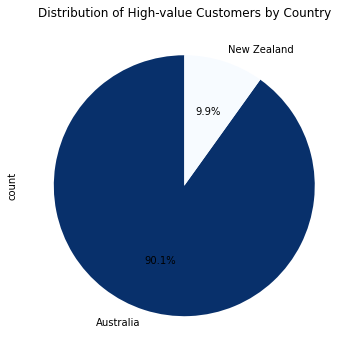

In [169]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')

# Calculate the count of customers by country
country_counts = df_top['Country'].value_counts()

# pie plot
country_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, cmap='Blues_r')
plt.title('Distribution of High-value Customers by Country')

plt.show()

In [170]:
print("Average shipping cost in two countries:")
df_top.groupby('Country')['Shipping Cost'].mean()

Average shipping cost in two countries:


Country
Australia      45.764622
New Zealand    54.357143
Name: Shipping Cost, dtype: float64


The analysis reveals that 90% of the customers are from Australia, a significantly higher proportion compared to New Zealand. Specifically, customers from New South Wales and Queensland account for the largest proportions, comprising 26% and 24%, respectively (see Figure 5).  

This trend could be attributed to the average shipping cost for New Zealand, which is 18% higher than that of Australia, or Kogan.com facing competition from online retailers based in New Zealand.		
    
Given Kogan.com's limited budget, we highly recommend prioritizing focus on Australian customers instead of allocating resources to minimize logistics costs or attempting to compete with other retailers in New Zealand.


By segments

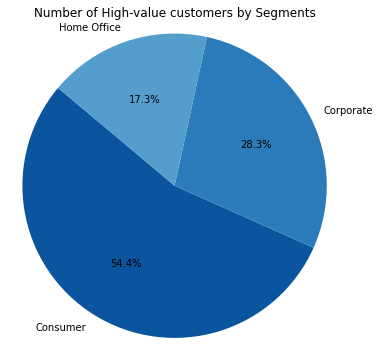

In [166]:
df_segments = df_top[['Customer ID', 'Segment']].drop_duplicates()
segment_counts = df_segments['Segment'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6), facecolor='white')
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues_r'))
plt.title('Number of High-value customers by Segments')
plt.axis('equal')
plt.show()

Despite being an e-commerce platform, Kogan.com serves not only individual consumers but also organizations, including Corporate and Home Office segments. This is evidenced by a significant 45.6% of its customer base comprising organizations   

Therefore, we believe that in addition to the existing approaches to individual customer outreach, Kogan.com should also employ other communication methods tailored specifically for organizational entities, such as phone calls and email correspondence. Furthermore, organizing programs and events in collaboration with businesses can be an effective way to promote the corporate image.


#### **High-value Customers' Behaviour**

Number of orders by months

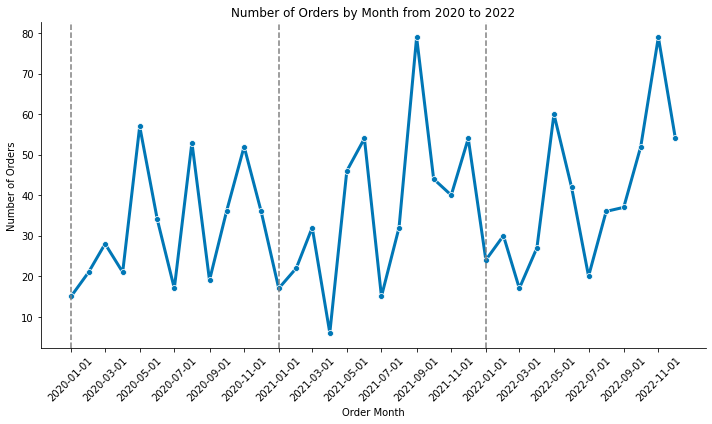

In [165]:
df_top['Order Date'] = pd.to_datetime(df_top['Order Date'])
df_top['Order Month'] = df_top['Order Date'].dt.strftime('%m/%Y')
df_top

# Convert 'Order Month' column to datetime type
df_top['Order Month'] = pd.to_datetime(df_top['Order Month'], format='%m/%Y')

# Filter the data for the year 2020
df_top_2020 = df_top[df_top['Order Month'].dt.year >= 2020]

# Group by 'Order Month' and count the number of orders
df_order_count_2020 = df_top_2020.groupby('Order Month')['Order ID'].count().reset_index()

# Plotting the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_order_count_2020, x='Order Month', y='Order ID', marker='o', color='#0077b6', linewidth=3)

# Adding labels and title
plt.xlabel('Order Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Month from 2020 to 2022')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Set the frequency of x-axis labels to every 2 months
plt.xticks(df_order_count_2020['Order Month'][::2])

# Adding vertical dash lines for the starting of each year
years = df_top_2020['Order Month'].dt.year.unique()
for year in years:
    first_day_year = pd.to_datetime(f'01-01-{year}', format='%d-%m-%Y')
    plt.axvline(x=first_day_year, color='gray', linestyle='--')
sns.despine(right=True)
# Show plot
plt.tight_layout()
plt.show()


Looking at the line chart, a seasonal pattern is captured which indicates peaks in the number of orders in May, September, and November every year from 2020 with over 50 orders. 

May could see increased demand due to end-of-financial-year sales and promotions. September might coincide with the back-to-school season, leading to higher purchases of electronics, stationery, and other related items. November typically includes events like Black Friday and Cyber Monday, which are known for significant discounts and promotions, driving higher consumer spending.

To meet heightened demand during peak months, Kogan.com can enhance inventory management such as restocking and offer seasonal promotions. By optimizing stock levels and providing targeted discounts on seasonal items, the company can drive sales and enhance customer satisfaction.


Best selling products

In [126]:
pd.DataFrame(df_top.groupby('Category')['Quantity'].sum()).reset_index()

,Category,Quantity
0,Furniture,1443
1,Office Supplies,3235
2,Technology,1483


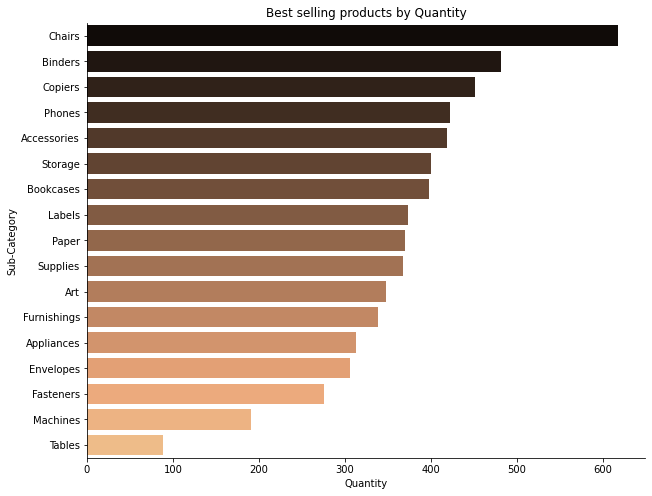

In [127]:
df_prod = pd.DataFrame(df_top.groupby('Sub-Category')['Quantity'].sum()).reset_index().sort_values(by='Quantity', ascending=False)

figure = plt.figure(figsize=(10,8))
sns.barplot(data=df_prod, y='Sub-Category', x='Quantity', palette="copper")
sns.despine(right=True)
plt.title("Best selling products by Quantity")
plt.show()


"Office Supplies" is the best-selling Product Category, with 3,235 items sold. Specifically, products such as Chairs, Binders, and Copiers are in high demand.